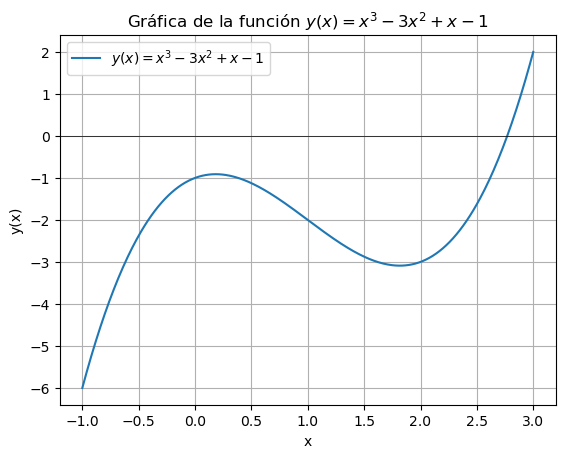

El método no convergió para la estimación inicial 1.5


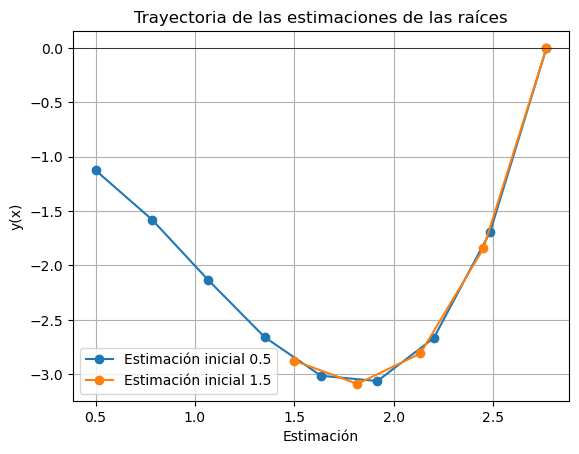

Raíces encontradas: [2.7692923542386314, 2.7692923542386314]


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(x):
    return x**3 - 3*x**2 + x - 1

def f_prime(x):
    return 3*x**2 - 6*x + 1

# Gráfica de la función
x_vals = np.linspace(-1, 3, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label=r'$y(x) = x^3 - 3x^2 + x - 1$')
plt.axhline(0, color='black', lw=0.5)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title("Gráfica de la función $y(x) = x^3 - 3x^2 + x - 1$")
plt.grid()
plt.show()

# Método de Newton modificado para capturar estimaciones
initial_guesses = [0.5, 1.5, 2.5]
roots = []
all_estimations = []

for guess in initial_guesses:
    root, result = newton(f, guess, fprime=f_prime, tol=1e-6, maxiter=50, full_output=True, disp=False)
    if result.converged:
        roots.append(root)
        all_estimations.append(result.iterations)
    else:
        print(f"El método no convergió para la estimación inicial {guess}")

# Gráfica de la trayectoria de las estimaciones
for i, guess in enumerate(initial_guesses):
    if i < len(all_estimations):  # Asegurarse de que haya estimaciones válidas
        x_estimation_points = np.linspace(guess, roots[i], all_estimations[i])
        plt.plot(x_estimation_points, f(np.array(x_estimation_points)), marker='o', label=f'Estimación inicial {guess}')

plt.axhline(0, color='black', lw=0.5)
plt.xlabel('Estimación')
plt.ylabel('y(x)')
plt.title("Trayectoria de las estimaciones de las raíces")
plt.legend()
plt.grid()
plt.show()

print("Raíces encontradas:", roots)
